# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

# SE REALIZA EL EJERCICIO DE 2 FORMAS DIFERENTES

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import sqlite3
import time
import seaborn as sns
import matplotlib.pyplot as plt


# Obtener los datos HTML desde un archivo de texto local
file_path = "/workspaces/PROGRAMA-DOOR-PROYECTO14web-scraping-project-tutorial/src/tesla.revenue.txt"
with open(file_path, 'r') as file:
    html_data = file.read()

time.sleep(10)

# Parsear el HTML
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")

# Buscar la tabla correcta
table = None
for table_elem in tables:
    if "Tesla Quarterly Revenue" in str(table_elem):
        table = table_elem
        break

if table is None:
    print("No se encontró la tabla de ingresos de Tesla")
    exit()

# Extraer los datos de la tabla
tesla_revenue = pd.read_html(str(table))[0]
tesla_revenue = tesla_revenue.rename(columns={"Tesla Quarterly Revenue(Millions of US $)": "Date", "Tesla Quarterly Revenue(Millions of US $).1": "Revenue"})
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",|\$", "")

# Filtrar y mostrar los datos
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
print(tesla_revenue)

# Guardar los datos en una base de datos SQLite
connection = sqlite3.connect('Tesla.db')
c = connection.cursor()
c.execute('''CREATE TABLE IF NOT EXISTS revenue (Date, Revenue)''')
c.executemany('INSERT INTO revenue VALUES (?,?)', tesla_revenue.values.tolist())
connection.commit()

# Consultar los datos guardados
for row in c.execute('SELECT * FROM revenue'):
    print(row)

# Cerrar la conexión a la base de datos
connection.close()

plt.figure(figsize=(15, 10))
sns.barplot(data=df, x='Date', y='Revenue')
plt.xticks(rotation=50)
plt.show()

('2022-03-31', '18756')
('2021-12-31', '17719')
('2021-09-30', '13757')
('2021-06-30', '11958')
('2021-03-31', '10389')
('2020-12-31', '10744')
('2020-09-30', '8771')
('2020-06-30', '6036')
('2020-03-31', '5985')
('2019-12-31', '7384')
('2019-09-30', '6303')
('2019-06-30', '6350')
('2019-03-31', '4541')
('2018-12-31', '7226')
('2018-09-30', '6824')
('2018-06-30', '4002')
('2018-03-31', '3409')
('2017-12-31', '3288')
('2017-09-30', '2985')
('2017-06-30', '2790')
('2017-03-31', '2696')
('2016-12-31', '2285')
('2016-09-30', '2298')
('2016-06-30', '1270')
('2016-03-31', '1147')
('2015-12-31', '1214')
('2015-09-30', '937')
('2015-06-30', '955')
('2015-03-31', '940')
('2014-12-31', '957')
('2014-09-30', '852')
('2014-06-30', '769')
('2014-03-31', '621')
('2013-12-31', '615')
('2013-09-30', '431')
('2013-06-30', '405')
('2013-03-31', '562')
('2012-12-31', '306')
('2012-09-30', '50')
('2012-06-30', '27')
('2012-03-31', '30')
('2011-12-31', '39')
('2011-09-30', '58')
('2011-06-30', '58')
('2011

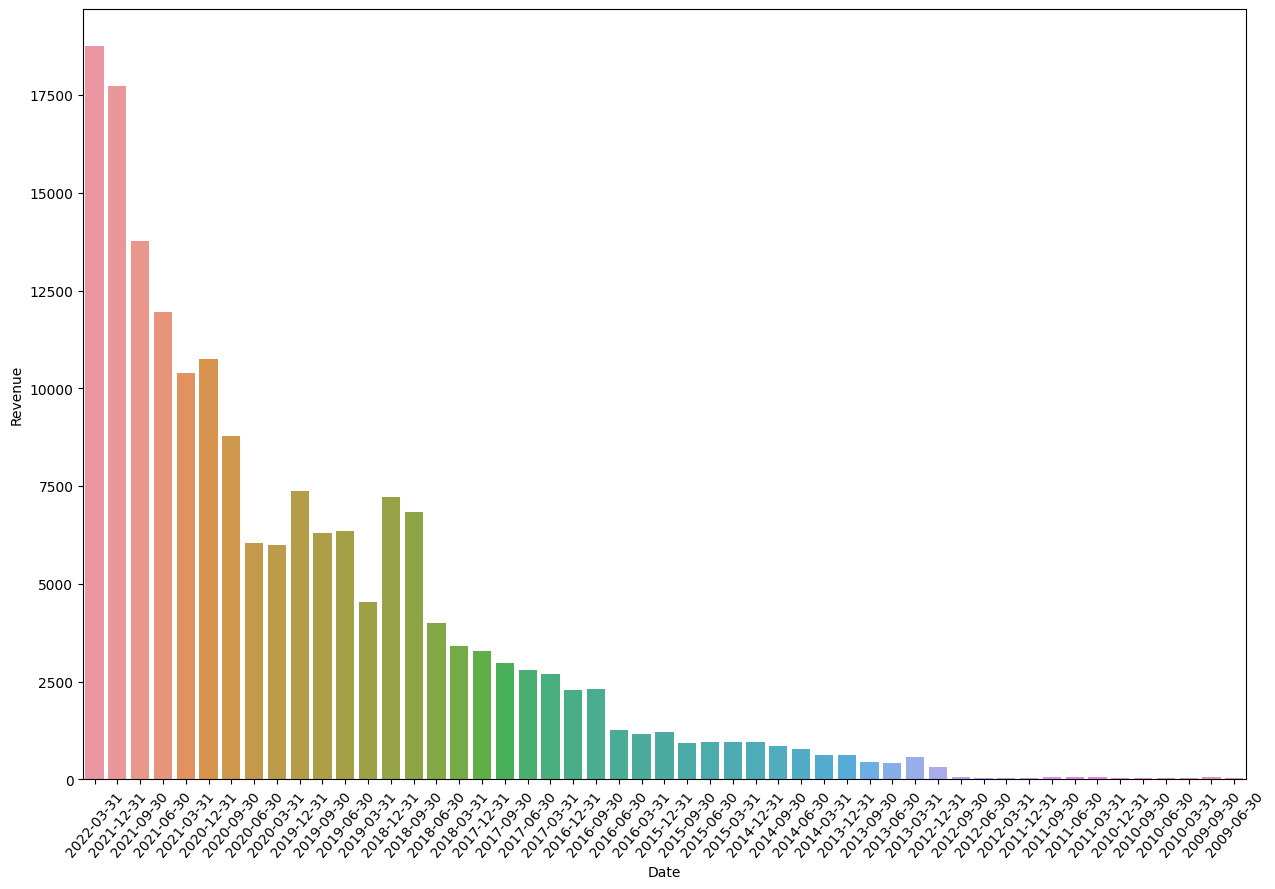

In [ ]:
import requests
import time
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup               #->Importamos la biblioteca BeautifulSoup.+
                                            #-> BeautifulSoup es una biblioteca de Python utilizada para analizar y extraer información de documentos HTML y XML
                                            #-> puede analizar documentos HTML/XML y acceder a sus elementos (etiquetas, atributos, texto, etc.) de manera sencilla
                                            #-> muy utilizada en tareas de web scraping
                                            #-> donde se necesita extraer datos estructurados de páginas web.

html_data = requests.get(" https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue", time.sleep(1)).text
bs = BeautifulSoup(open("/workspaces/PROGRAMA-DOOR-PROYECTO14web-scraping-project-tutorial/src/list.html"), "html") 

tables = bs.find_all("table")


table_html = str(tables)


df = pd.read_html(table_html)[0]


df = df.loc[:, ~df.columns.str.startswith('Unnamed')]


df = df.rename(columns={"Tesla Quarterly Revenue(Millions of US $)": "Date", "Tesla Quarterly Revenue(Millions of US $).1": "Revenue"})
df['Revenue'] = df['Revenue'].replace(",", '').replace('$', '')

df = df.dropna()


df['Revenue'] = df['Revenue'].astype(str)


records = df.to_records(index=False)
datatuples = list(records)
datatuples


con = sqlite3.connect('Tesla.db')

cur = con.cursor()

cur.execute("CREATE TABLE IF NOT EXISTS Tesla (Date, Revenue)")

cur.executemany("INSERT INTO Tesla VALUES (?, ?)", datatuples)

con.commit()


for row in cur.execute('SELECT * FROM Tesla'):
    print(row)




df['Revenue'] = df['Revenue'].astype(int)

plt.figure(figsize=(15, 10))
sns.barplot(data=df, x='Date', y='Revenue')
plt.xticks(rotation=50)
plt.show()